In [47]:
import numpy as np
import pandas as pd
daily_index=pd.date_range("2020-02-28",periods=4,freq="D")
daily_index
weekly_index = pd.date_range("2020-01-01","2020-01-31",freq="W-TUE")#W-字首
weekly_index

DatetimeIndex(['2020-01-07', '2020-01-14', '2020-01-21', '2020-01-28'], dtype='datetime64[ns]', freq='W-TUE')

<AxesSubplot:xlabel='Date'>

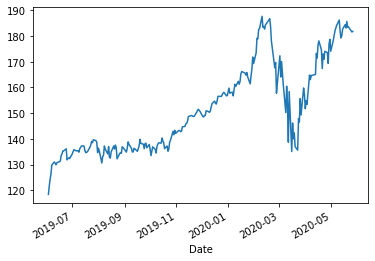

In [49]:
msft = pd.read_csv("D:/python class/MSFT.csv",index_col="Date",parse_dates=["Date"])
#msft.loc[:,"Date"] = pd.to_datetime(msft["Date"])
msft.loc[:,"Volume"] = msft.astype("float")
msft = msft.sort_index()
#msft.info()
msft.index.date
msft.loc["2019","Adj Close"]#loc是用index去找，後面參數為還想多看什麼
msft.loc["2019-06":"2020-05","Adj Close"].plot()

<AxesSubplot:xlabel='Date'>

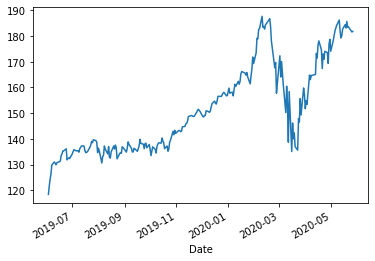

In [53]:
#parse_dates將Date列設置為時間類型
#index_col將Date列設置為索引
msft = pd.read_csv("D:/python class/MSFT.csv",
                               index_col="Date",parse_dates=["Date"]) 
msft.loc[:,"Volume"] = msft["Volume"].astype("float")
msft = msft.sort_index()
msft.index.date
msft.loc["2019","Adj Close"]
msft.loc["2019-06":"2020-05","Adj Close"].plot()

In [57]:
msft_close = msft.loc[:,["Adj Close"]].copy()
msft_close.index = msft_close.index + pd.DateOffset(hours=16)
msft_close.head(2)
msft_close = msft_close.tz_localize("America/New_York")
#msft_close = msft_close.tz_convert("UTC")
msft_close.head(2)


,Adj Close
Date,
1986-03-13 16:00:00-05:00,0.062205
1986-03-14 16:00:00-05:00,0.064427


,returns
Date,
1986-03-13 16:00:00-05:00,NaN
1986-03-14 16:00:00-05:00,0.035097
1986-03-17 16:00:00-05:00,0.017082
1986-03-18 16:00:00-05:00,-0.025749
1986-03-19 16:00:00-05:00,-0.017547


,Adj Close
Date,
1986-03-13 16:00:00-05:00,NaN
1986-03-14 16:00:00-05:00,0.035721
1986-03-17 16:00:00-05:00,0.017229
1986-03-18 16:00:00-05:00,-0.025421
1986-03-19 16:00:00-05:00,-0.017394


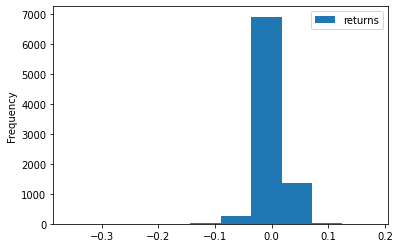

In [26]:
msft_close.shift(1).head()
returns = np.log(msft_close / msft_close.shift(1))
returns = returns.rename(columns={"Adj Close":"returns"})
returns.head
returns.plot.hist()
simple_rets = msft_close.pct_change()
simple_rets.head()

<AxesSubplot:xlabel='Date'>

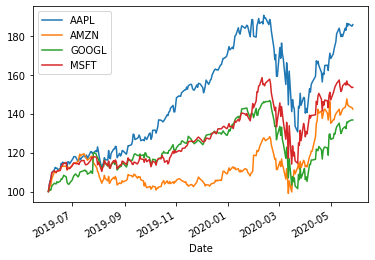

In [40]:
parts = []
for ticker in ("AAPL" , "AMZN" ,"GOOGL" , "MSFT"):
    adj_close = pd.read_csv(f"{ticker}.csv",
                        index_col="Date",parse_dates=["Date"],
                         usecols=["Date","Adj Close"])
    adj_close = adj_close.rename(columns={"Adj Close" : ticker})
    parts.append(adj_close)#化為陣列，APPREND是在資料後面新增欄位
adj_close = pd.concat(parts,axis=1)#直向合併
adj_close = adj_close.dropna()
adj_close_sample = adj_close.loc["2019-06":"2020-05",:]
rebased_price = adj_close_sample/adj_close_sample.iloc[0,:]*100
rebased_price.head(2)
rebased_price.plot()


In [37]:
returns = np.log(adj_close / adj_close.shift(1))
returns.corr()
import plotly.express as px
fig = px.imshow(returns.corr(),
                x=adj_close.columns,
                y=adj_close.columns,
                color_continuous_scale=list(reversed(px.colors.sequential.RdBu)),#RdBu是一組顏色序列
                zmin=-1,zmax=1)
fig.show()

In [41]:
end_of_month = adj_close.resample('M').last()#把資料取出來，但間隔一個月，並取最後一天
end_of_month.head()
adj_close.resample("W-FRI").ffill().head()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2004-08-31,2.132708,38.139999,51.236237,17.673630
2004-09-30,2.396127,40.860001,64.864868,17.900215
2004-10-31,3.240182,34.130001,95.415413,18.107374
2004-11-30,4.146072,39.680000,91.081078,19.344421
2004-12-31,3.982207,44.290001,96.491493,19.279480


Date
2019-01-02           NaN
2019-01-03           NaN
2019-01-04           NaN
2019-01-07           NaN
2019-01-08           NaN
                 ...    
2019-12-24    151.577874
2019-12-26    151.927543
2019-12-27    152.299091
2019-12-30    152.621710
2019-12-31    152.944327
Name: 25day average, Length: 252, dtype: float64

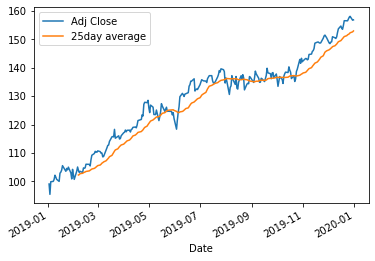

In [61]:
msft19 = msft.loc["2019" , ["Adj Close"]].copy()
msft19.loc[:,"25day average"] = msft19["Adj Close"].rolling(25).mean()#25天均線
msft19.plot()